<a href="https://colab.research.google.com/github/Manwi23/Hello-Darkness/blob/main/model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow==1.14
!pip install rawpy
!pip install scipy==1.2.0

     |████████████████████████████████| 109.3MB 97kB/s 
     |████████████████████████████████| 51kB 5.6MB/s 
     |████████████████████████████████| 491kB 34.0MB/s 
     |████████████████████████████████| 3.2MB 31.4MB/s 
ERROR: kapre 0.3.5 has requirement tensorflow>=2.0.0, but you'll have tensorflow 1.14.0 which is incompatible.
  Found existing installation: tensorflow-estimator 2.5.0
    Uninstalling tensorflow-estimator-2.5.0:
      Successfully uninstalled tensorflow-estimator-2.5.0
  Found existing installation: tensorboard 2.5.0
    Uninstalling tensorboard-2.5.0:
      Successfully uninstalled tensorboard-2.5.0
  Found existing installation: tensorflow 2.5.0
    Uninstalling tensorflow-2.5.0:
      Successfully uninstalled tensorflow-2.5.0
     |████████████████████████████████| 1.7MB 3.4MB/s 
     |████████████████████████████████| 26.6MB 1.5MB/s 
ERROR: kapre 0.3.5 has requirement tensorflow>=2.0.0, but you'll have tensorflow 1.14.0 which is incompatible.
ERROR: albumentatio

In [ ]:
import tensorflow.contrib

import matplotlib.pyplot as plt
import rawpy
import os

/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

In [ ]:
!git clone https://github.com/cchen156/Learning-to-See-in-the-Dark.git

Cloning into 'Learning-to-See-in-the-Dark'...
remote: Enumerating objects: 171, done.
remote: Total 171 (delta 0), reused 0 (delta 0), pack-reused 171
Receiving objects: 100% (171/171), 471.42 KiB | 7.73 MiB/s, done.
Resolving deltas: 100% (95/95), done.


In [ ]:
%cd Learning-to-See-in-the-Dark/
!python download_models.py

/content/Learning-to-See-in-the-Dark
Dowloading Sony Model (84Mb)
Dowloading Fuji Model (84Mb)


In [ ]:
!cd dataset && wget https://storage.googleapis.com/isl-datasets/SID/Sony.zip

--2021-05-28 07:01:56--  https://storage.googleapis.com/isl-datasets/SID/Sony.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.210.128, 173.194.211.128, 173.194.213.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.210.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 26926662016 (25G) [application/zip]
Saving to: ‘Sony.zip’

Sony.zip            100%[===================>]  25.08G  37.9MB/s    in 7m 8s   

2021-05-28 07:09:05 (60.0 MB/s) - ‘Sony.zip’ saved [26926662016/26926662016]



In [ ]:
# %cd Learning-to-See-in-the-Dark/
# !python test_Sony.py 

In [ ]:
# !cd Learning-to-See-in-the-Dark && ls

In [ ]:
# !ls

In [ ]:
# !cd result_Sony && cd final && ls

In [ ]:
# !cd dataset && unzip -l Sony.zip >> conts

In [ ]:
def unzip_only(n, testset_only=True):
    cmd = "cd dataset && unzip -l Sony.zip"
    out = os.popen(cmd).read()
    #cmd = "cd dataset && cat Sony_test_list.txt"
    cmd = "cd dataset && cat Sony_train_list.txt"
    l = os.popen(cmd).read()

    in_testset_long = []
    in_testset_short = []

    for line in l.split('\n'):
        sp = line.split(' ')
        if len(sp) > 1:
            lo = sp[1].split('/')[3]
            sh = sp[0].split('/')[3]
            in_testset_long += [lo]
            in_testset_short += [sh]

    needed = []
    cnt = 0

    cmd = "cd dataset && mkdir Sony"
    os.system(cmd)

    cmd = "cd dataset/Sony && mkdir short"
    os.system(cmd)

    cmd = "cd dataset/Sony && mkdir long"
    os.system(cmd)

    eee = 0

    # print(in_testset_long)

    for line in out.split('\n'):
        # print("ok", len(needed), cnt)
        sp = line.split('/')
        if len(sp) > 1:
            ph = sp[-1]
            doing = True
            if ph and (ph in needed or cnt < n):
                if ph[0] == '1':
                    print(ph, ph in needed, ph in in_testset_short, ph in in_testset_long, line)
                if ph not in needed:
                    cnt += 1
                    if 'short' in line:
                        ind = in_testset_short.index(ph) if ph in in_testset_short else None
                        if ind is None:
                            cnt -= 1
                            doing = False
                        else:
                            needed += [in_testset_long[ind]]
                    else:
                        ind = in_testset_long.index(ph) if ph in in_testset_long else None
                        if ind is None:
                            cnt -= 1
                            doing = False
                        else:
                            needed += [in_testset_short[ind]]
                else:
                    needed.remove(ph)
                if doing:
                    path = ''
                    if 'short' in line:
                        path = 'Sony/short/' + ph
                    else:
                        path = 'Sony/long/' + ph
                    cmd = "cd dataset && unzip -p Sony.zip " + path + " > " + path
                    os.system(cmd)
            elif cnt >= n and len(needed) < 1:
                break

In [ ]:
unzip_only(5)

In [ ]:
# %cd Learning-to-See-in-the-Dark

In [ ]:
!cd dataset && cd Sony && cd long && ls

00001_00_10s.ARW  00009_00_10s.ARW  10006_00_10s.ARW  10022_00_10s.ARW
00002_00_10s.ARW  00010_00_10s.ARW  10011_00_10s.ARW
00004_00_10s.ARW  10003_00_10s.ARW  10016_00_10s.ARW


In [ ]:
!cd dataset && cd Sony && cd short && ls

00001_00_0.04s.ARW  00009_00_0.04s.ARW	10006_00_0.04s.ARW  10022_00_0.04s.ARW
00002_00_0.04s.ARW  00010_00_0.04s.ARW	10011_00_0.04s.ARW
00004_00_0.04s.ARW  10003_00_0.04s.ARW	10016_00_0.04s.ARW


In [ ]:
# !cd dataset && cd Sony && rm -r long

In [ ]:
!python test_Sony.py 

/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

In [ ]:
def plot_k_model_outputs(k=3, fig_x=20, fig_y=10):
    img_list = os.listdir("result_Sony/final")
    img_list.sort()
    model_path = "result_Sony/final/"
    short_img = 'dataset/Sony/short/'
    fig, axes = plt.subplots(nrows=k, ncols=4, figsize=(fig_x, fig_y))
    [axi.set_axis_off() for axi in axes.ravel()]
    axes[0][0].title.set_text('Short exposure')
    axes[0][1].title.set_text('Long exposure')
    axes[0][2].title.set_text('Model output')
    axes[0][3].title.set_text('Scaled output')
    for i in range(k):
        name = img_list[i*3][:-10]
        gt_raw = rawpy.imread(short_img+name+'0.04s.ARW')
        im = gt_raw.postprocess()
        axes[i][0].imshow(im)
        img = plt.imread(model_path+img_list[i*3])
        axes[i][1].imshow(img)
        img = plt.imread(model_path+img_list[i*3+1])
        axes[i][2].imshow(img)
        img = plt.imread(model_path+img_list[i*3+2])
        axes[i][3].imshow(img)

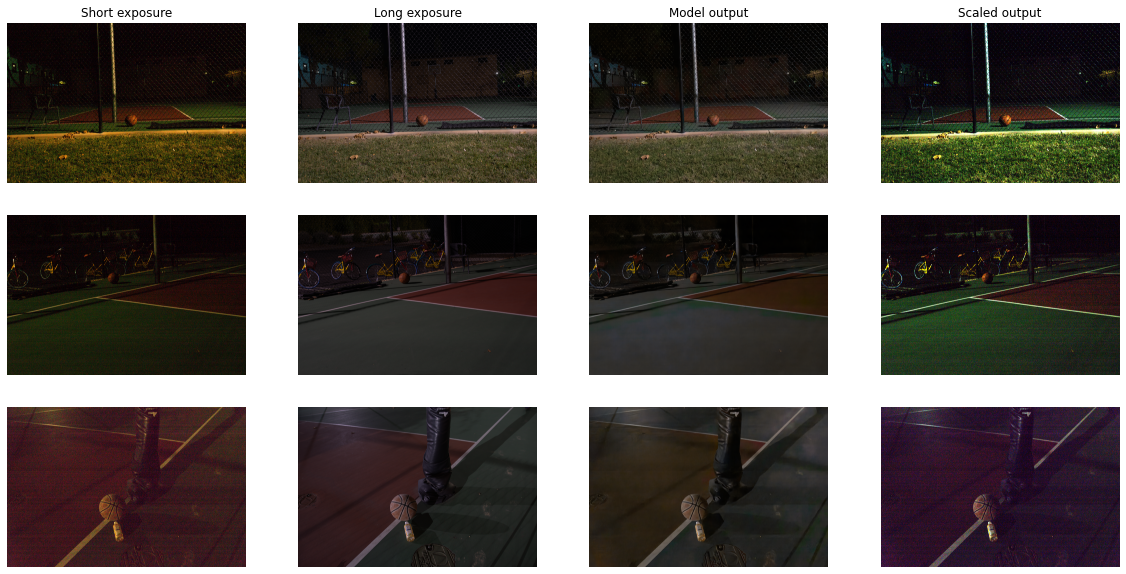

In [ ]:
plot_k_model_outputs(k=3)

In [ ]:
import torch
import torch.nn.functional as F
import torchvision.transforms.functional as ttf
import torchvision
from torch import nn
from torch.autograd import Variable

import random

import numpy as np

In [ ]:
CUDA = False

In [ ]:
def preprocess(image, ground_truth):
    s = image.shape
    if len(s) == 3 and s[2] == 4:
        image = image.permute(2, 0, 1)
        ground_truth = ground_truth.permute(2, 0, 1)
    i, j, h, w = torchvision.transforms.RandomCrop.get_params(image, output_size=(512, 512))
    image = ttf.crop(image, i, j, h, w)
    ground_truth = ttf.crop(ground_truth, i, j, h*2, w*2)

    if random.random() > 0.5:
        image = ttf.hflip(image)
        ground_truth = ttf.hflip(ground_truth)

    if random.random() > 0.5:
        image = ttf.vflip(image)
        ground_truth = ttf.vflip(ground_truth)

    image = torch.tensor(image)
    image = torch.unsqueeze(image, 0)
    ground_truth = torch.tensor(ground_truth)
    ground_truth = torch.unsqueeze(ground_truth, 0)
    return image, ground_truth

In [ ]:
def pack_raw(raw):

    # pack Bayer image to 4 channels & subtract black level
    im = raw.raw_image_visible.astype(np.float32)
    # print(im.shape)
    im = np.maximum(im - 512, 0) / (16383 - 512)  # subtract the black level
    ## ja się chętnie pewnego dnia dowiem po co jest to dzielenie

    im = np.expand_dims(im, axis=2)
    img_shape = im.shape
    H = img_shape[0]
    W = img_shape[1]

    out = np.concatenate((im[0:H:2, 0:W:2, :],
                          im[0:H:2, 1:W:2, :],
                          im[1:H:2, 1:W:2, :],
                          im[1:H:2, 0:W:2, :]), axis=2)
    
    return torch.tensor(out)

In [ ]:
ex_short = 'dataset/Sony/short/'+'00004_00_'+'0.04s.ARW'
ex_long = 'dataset/Sony/long/'+'00004_00_'+'10s.ARW'

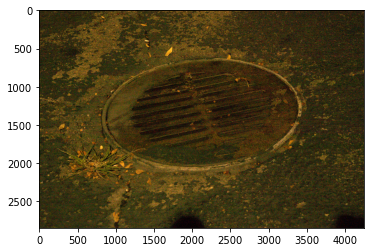

In [ ]:
gt_raw = rawpy.imread(ex_short)
out = pack_raw(gt_raw)
#print(gt_raw.sizes)
im = gt_raw.postprocess()
plt.imshow(im)
#print(out.shape)

In [ ]:
img_short = rawpy.imread(ex_short)
img_long = rawpy.imread(ex_long)
img_short, img_long = pack_raw(img_short), pack_raw(img_long)
img_short, img_long = preprocess(img_short, img_long)
print(img_short.shape)

torch.Size([1, 4, 512, 512])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


In [ ]:
# plt.imshow(img_short)

In [ ]:
# plt.imshow(img_long)

In [ ]:
!cd result_Sony/final/ && ls

/bin/bash: line 0: cd: result_Sony/final/: No such file or directory


In [ ]:
def get_amplification_ratio(img_path, gt_path):
    img_base = os.path.basename(img_path)
    gt_base = os.path.basename(gt_path)
    img_time = float(img_base[9:-5])
    gt_time = float(gt_base[9:-5])
    return gt_time / img_time

In [ ]:
get_amplification_ratio(ex_short, ex_long)

250.0

In [ ]:
from torch import nn
import torch.optim as optim

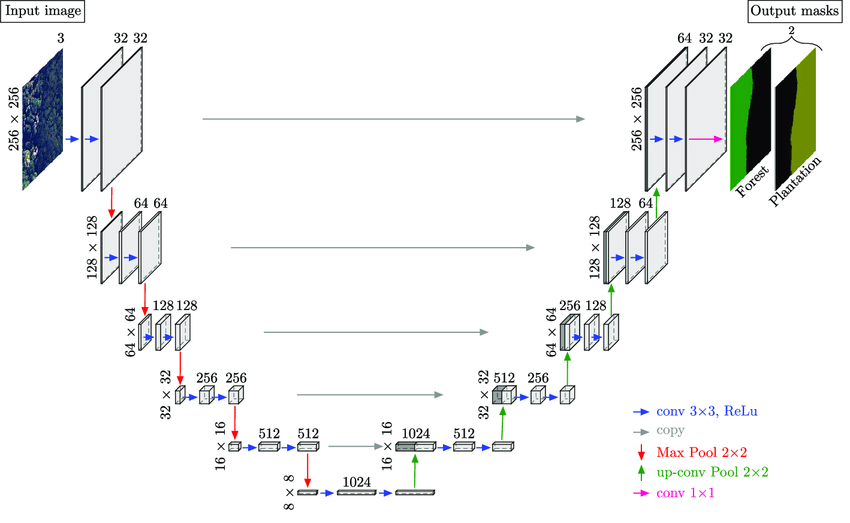

In [ ]:
class Conv_layer(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(Conv_layer, self).__init__()
        self.layer = nn.Sequential(
            nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(out_channels, out_channels, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),)
    
    def forward(self, X):
        return self.layer(X)

    def loss(self, Out, Targets):
        return F.cross_entropy(Out, Targets)

In [ ]:
class Down_layer(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(Down_layer, self).__init__()
        self.pool_down = nn.MaxPool2d(2)
        self.conv = Conv_layer(in_channels, out_channels)

    def forward(self, X):
        out = self.pool_down(X)
        out = self.conv(out)
        return out

    def loss(self, Out, Targets):
        return F.cross_entropy(Out, Targets)

In [ ]:
class Up_layer(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(Up_layer, self).__init__()
        self.pool_up = nn.ConvTranspose2d(in_channels, out_channels, 2, stride=2)
        self.conv = Conv_layer(in_channels, out_channels)

    def forward(self, X_d, X_u):
        X_d= self.pool_up(X_d)
        concat_out = torch.cat([X_u, X_d], 1)
        out = self.conv(concat_out)
        return out

    def loss(self, Out, Targets):
        return F.cross_entropy(Out, Targets)

In [ ]:
class U_net(nn.Module):
    def __init__(self):
        super(U_net, self).__init__()
        self.down_layer1 = Conv_layer(4, 32)
        self.down_layer2 = Down_layer(32, 64)
        self.down_layer3 = Down_layer(64, 128)
        self.down_layer4 = Down_layer(128, 256)
        self.down_layer5 = Down_layer(256, 512)

        self.up_layer1 = Up_layer(512, 256)
        self.up_layer2 = Up_layer(256, 128)
        self.up_layer3 = Up_layer(128, 64)
        self.up_layer4 = Up_layer(64, 32)
        self.up_layer5 = nn.Conv2d(32, 12, 1)
        self.out_layer = nn.PixelShuffle(2)


    def forward(self, X):
        d1 = self.down_layer1(X)
        d2 = self.down_layer2(d1)
        d3 = self.down_layer3(d2)
        d4 = self.down_layer4(d3)
        d5 = self.down_layer5(d4)

        u1 = self.up_layer1(d5, d4)
        u2 = self.up_layer2(u1, d3)
        u3 = self.up_layer3(u2, d2)
        u4 = self.up_layer4(u3, d1)
        u5 = self.up_layer5(u4)

        out = self.out_layer(u5)
        return out

    def loss(self, Out, Targets):
        return F.cross_entropy(Out, Targets)

In [ ]:
model = U_net()
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

In [ ]:
model = model.to(device)

In [ ]:
short_ex_img_path = './dataset/Sony/short/'
long_ex_img_path = './dataset/Sony/long/'

In [ ]:
def get_train_names():
    all_from_dir = os.listdir(long_ex_img_path)
    train_images  = [x[0:5] for x in all_from_dir if x.startswith('0') and x.endswith('.ARW')]
    return train_images

In [ ]:
def get_test_names():
    all_from_dir = os.listdir(long_ex_img_path)
    train_images  = [x[0:5] for x in all_from_dir if x.startswith('1') and x.endswith('.ARW')]
    return train_images

In [ ]:
train_names = get_train_names()

In [ ]:
n = max(map(int, train_names)) + 1
n

11

In [ ]:
train_names

['00002', '00004', '00009', '00001', '00010']

In [ ]:
loaded_img = {
    'long' : [None] * 6000, 
    'short' : {
        100 : [None] * n,
        250 : [None] * n,
        300 : [None] * n
    }
}

In [ ]:
loaded_img['short']

{100: [None, None, None, None, None, None, None, None, None, None, None],
 250: [None, None, None, None, None, None, None, None, None, None, None],
 300: [None, None, None, None, None, None, None, None, None, None, None]}

In [ ]:
os.makedirs('models/Sony')

In [ ]:
saved_model_param = './models/Sony'

In [ ]:
def load_image(s_path, l_path, name, amp_ratio):
    if loaded_img['short'][amp_ratio][int(name)] is None:
        short_raw = rawpy.imread(s_path)
        loaded_img['short'][amp_ratio][int(name)] = pack_raw(short_raw)

        long_raw = rawpy.imread(l_path)
        long_img = long_raw.postprocess(use_camera_wb=True, half_size=False, no_auto_bright=True, output_bps=16)
        long_img = np.float32(long_img / 65535.0)
        long_img = torch.tensor(long_img)
        loaded_img['long'][int(name)] = long_img
    return loaded_img['short'][amp_ratio][int(name)], loaded_img['long'][int(name)]

In [ ]:
def get_last_epoch():

    def get_epoch(path):
        return int(path.split('.')[0].split('-')[-1])

    try:
        last_epoch = max(map(get_epoch, os.listdir(saved_model_param)))
    except:
        return False, 0, None

    return True, last_epoch, '/epoch-%d.pth' % last_epoch

In [ ]:
def train_sony(model, train_names, num_epoch, save_every=10, model_name=U_net):
    learning_rate = 1e-4
    loss = nn.L1Loss(reduction='mean')
    optimizer = optim.Adam(model.parameters(), lr = learning_rate)

    saved_prev, last_epoch, path_last_epoch = get_last_epoch()
    if saved_prev:
        last_epoch += 1
        model = model_name()
        model.load_state_dict(torch.load(saved_model_param + path_last_epoch))
        model = model.to(device)
        model.eval()

    for epoch in range(last_epoch, num_epoch):
        if epoch > 2000:
            for param in optimizer.param_groups:
                param['lr'] = 1e-5
        #print(epoch)
        order = np.random.permutation(train_names)
        short_ex_img = os.listdir(short_ex_img_path)
        long_ex_img = os.listdir(long_ex_img_path)
        for name in order:
            s_images  = [img for img in short_ex_img if img.startswith(name) and img.endswith('.ARW')]
            image = s_images[np.random.randint(0, len(s_images))]
            s_path = short_ex_img_path + image
            l_path = long_ex_img_path + [img for img in long_ex_img if img.startswith(name) and img.endswith('.ARW')][0]

            amp_ratio = get_amplification_ratio(s_path, l_path)

            s_img, l_img = load_image(s_path, l_path, name, amp_ratio)
            s_img, l_img = preprocess(s_img, l_img)

            model.zero_grad()
            s_img = model(s_img)
            loss_img = loss(s_img, l_img)
            #print(loss_img)
            loss_img.backward()
            optimizer.step()
        if epoch%save_every==0:
            torch.save(model.state_dict(), os.path.join(saved_model_param, 'epoch-{}.pth'.format(epoch)))
        #print('\n')

In [ ]:
train_sony(model, train_names, 6, 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


In [ ]:
!cd models/Sony && ls

epoch-0.pth  epoch-1.pth  epoch-2.pth  epoch-3.pth  epoch-4.pth  epoch-5.pth


In [ ]:
train_sony(model, train_names, 10, 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


In [ ]:
!cd models/Sony && ls

epoch-0.pth  epoch-2.pth  epoch-4.pth  epoch-6.pth  epoch-8.pth
epoch-1.pth  epoch-3.pth  epoch-5.pth  epoch-7.pth  epoch-9.pth


In [ ]:
test_names = get_test_names()
test_names

['10016', '10022', '10003', '10011', '10006']

In [ ]:
short_ex_img_path = './dataset/Sony/short/'
long_ex_img_path = './dataset/Sony/long/'

In [ ]:
!cd ./dataset/Sony/short/ && ls

00001_00_0.04s.ARW  00009_00_0.04s.ARW	10006_00_0.04s.ARW  10022_00_0.04s.ARW
00002_00_0.04s.ARW  00010_00_0.04s.ARW	10011_00_0.04s.ARW
00004_00_0.04s.ARW  10003_00_0.04s.ARW	10016_00_0.04s.ARW


In [ ]:
def test_sony(model_name=U_net):
    result_dir = './result_Sony/'
    saved_prev, last_epoch, path_last_epoch = get_last_epoch()
    if saved_prev:
        model = model_name()
        model.load_state_dict(torch.load(saved_model_param + path_last_epoch))
        model = model.to(device)
        model.eval()
    short_ex_img = os.listdir(short_ex_img_path)
    long_ex_img = os.listdir(long_ex_img_path)
    #to jest tak ważna linijka, że ja nie wiem czemu oświeciło mnie dopiero teraz
    with torch.no_grad():
        for name in test_names:
            s_images  = [img for img in short_ex_img if img.startswith(name) and img.endswith('.ARW')]
            l_image = [img for img in long_ex_img if img.startswith(name) and img.endswith('.ARW')][0]
            l_path = long_ex_img_path+l_image
            long_raw = rawpy.imread(l_path)
            long_img = long_raw.postprocess(use_camera_wb=True, half_size=False, no_auto_bright=True, output_bps=16)
            long_img = np.float32(long_img / 65535.0)
            for img in s_images:
                s_path = short_ex_img_path+img
                ratio = get_amplification_ratio(s_path, l_path)
                short_raw = rawpy.imread(s_path)
                short_to_model = torch.unsqueeze(torch.tensor(pack_raw(short_raw).permute(2, 0, 1)), 0)
                im = short_raw.postprocess(use_camera_wb=True, half_size=False, no_auto_bright=True, output_bps=16)
                scale_full = np.float32(im / 65535.0)
                output = model(short_to_model)
                output = torch.clamp(output, min=0.0, max=1.0)
                output = output.squeeze().cpu().numpy().transpose((1, 2, 0))
                #trzeba to będzie zmienić na coś innego 
                scipy.misc.toimage(output * 255, high=255, low=0, cmin=0, cmax=255).save(
                  result_dir + 'final/%s_00_%d_out.png' % (name, ratio))
                scipy.misc.toimage(scale_full * 255, high=255, low=0, cmin=0, cmax=255).save(
                  result_dir + 'final/%s_00_%d_scale.png' % (name, ratio))
                scipy.misc.toimage(long_img * 255, high=255, low=0, cmin=0, cmax=255).save(
                  result_dir + 'final/%s_00_%d_gt.png' % (name, ratio))

In [ ]:
os.makedirs('./result_Sony/final')

In [ ]:
!ls

checkpoint	     images	 result_Sony	train_Sony.py
dataset		     LICENSE.md  test_Fuji.py
download_dataset.py  models	 test_Sony.py
download_models.py   README.md	 train_Fuji.py


In [ ]:
import scipy

In [ ]:
test_sony()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: DeprecationWarning:     `toimage` is deprecated!
    `toimage` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
    Use Pillow's ``Image.fromarray`` directly instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: DeprecationWarning:     `toimage` is deprecated!
    `toimage` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
    Use Pillow's ``Image.fromarray`` directly instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: DeprecationWarning:     `toimage` is deprecated!
    `toimage` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
    Use Pillow's ``Image.fromarray`` directly instead.


In [ ]:
!cd ./result_Sony/final && ls

10003_00_250_gt.png	10006_00_250_scale.png	10016_00_250_out.png
10003_00_250_out.png	10011_00_250_gt.png	10016_00_250_scale.png
10003_00_250_scale.png	10011_00_250_out.png	10022_00_250_gt.png
10006_00_250_gt.png	10011_00_250_scale.png	10022_00_250_out.png
10006_00_250_out.png	10016_00_250_gt.png	10022_00_250_scale.png


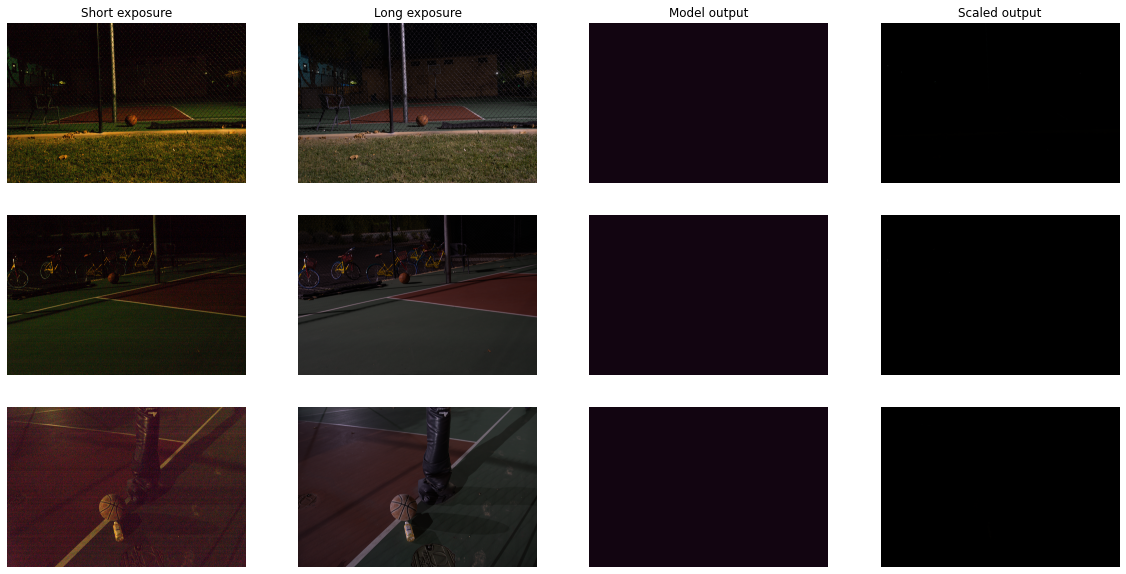

In [ ]:
plot_k_model_outputs(k=3)